In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import folium
from google.colab import drive

# Kết nối với Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Telecom.xlsx'

# Đọc dữ liệu vào DataFrame
df = pd.read_excel(file_path)

# Hiển thị một số dòng đầu tiên của DataFrame
print(df.head())

    month  date          start time            end time  \
0  201406     1 2014-06-01 10:22:36 2014-06-01 11:09:52   
1  201406     1 2014-06-01 07:00:37 2014-06-01 08:49:20   
2  201406     1 2014-06-01 02:49:16 2014-06-01 05:49:12   
3  201406     1 2014-06-01 08:51:58 2014-06-01 09:20:50   
4  201406     1 2014-05-31 23:49:10 2014-06-01 02:49:07   

  location(latitude/lontitude)                           user id  
0         31.237872/121.470259  edbc54bddf16494a49f39ac057b4185d  
1         31.237872/121.470259  f8206ab58b9bdb070673f7050242e9ee  
2         31.237872/121.470259  f8206ab58b9bdb070673f7050242e9ee  
3         31.237872/121.470259  f8206ab58b9bdb070673f7050242e9ee  
4         31.237872/121.470259  f8206ab58b9bdb070673f7050242e9ee  


In [ ]:
df.dropna(subset=['location(latitude/lontitude)'], inplace=True)
df[['latitude', 'longitude']] = df['location(latitude/lontitude)'].str.split('/', expand=True)
df.head(5)

,month,date,start time,end time,location(latitude/lontitude),user id,latitude,longitude
0,201406,1,2014-06-01 10:22:36,2014-06-01 11:09:52,31.237872/121.470259,edbc54bddf16494a49f39ac057b4185d,31.237872,121.470259
1,201406,1,2014-06-01 07:00:37,2014-06-01 08:49:20,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259
2,201406,1,2014-06-01 02:49:16,2014-06-01 05:49:12,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259
3,201406,1,2014-06-01 08:51:58,2014-06-01 09:20:50,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259
4,201406,1,2014-05-31 23:49:10,2014-06-01 02:49:07,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259


In [ ]:
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')

In [ ]:
df_1 = df[(df['latitude'].astype(float) >= 30.6) & (df['latitude'].astype(float) <= 31.9)]
print(df_1)

         month  date          start time            end time  \
0       201406     1 2014-06-01 10:22:36 2014-06-01 11:09:52   
1       201406     1 2014-06-01 07:00:37 2014-06-01 08:49:20   
2       201406     1 2014-06-01 02:49:16 2014-06-01 05:49:12   
3       201406     1 2014-06-01 08:51:58 2014-06-01 09:20:50   
4       201406     1 2014-05-31 23:49:10 2014-06-01 02:49:07   
...        ...   ...                 ...                 ...   
609397  201406    15 2014-06-15 08:25:37 2014-06-15 08:25:49   
609398  201406    15 2014-06-15 15:49:59 2014-06-15 15:50:27   
609399  201406    15 2014-06-15 04:39:41 2014-06-15 04:40:01   
609400  201406    15 2014-06-15 05:49:19 2014-06-15 05:49:55   
609401  201406    15 2014-06-15 20:13:25 2014-06-15 20:32:19   

       location(latitude/lontitude)                           user id  \
0              31.237872/121.470259  edbc54bddf16494a49f39ac057b4185d   
1              31.237872/121.470259  f8206ab58b9bdb070673f7050242e9ee   
2           

In [ ]:
df_2= df_1.drop(['month','date','start time', 'end time'], axis=1)
df_2 = df_2.drop_duplicates()
df_2.head()

,location(latitude/lontitude),user id,latitude,longitude
0,31.237872/121.470259,edbc54bddf16494a49f39ac057b4185d,31.237872,121.470259
1,31.237872/121.470259,f8206ab58b9bdb070673f7050242e9ee,31.237872,121.470259
6,31.237872/121.470259,eb7f2c8f7030376959889a2fae9c3a1d,31.237872,121.470259
14,31.246946/121.513919,40d41c461cd11402231d8e63b1d57314,31.246946,121.513919
15,31.232877/121.48753,d8ff6385af928b96af66956b40ca06c4,31.232877,121.487530


<ipython-input-7-39a7581fc54c>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='latitude', y='longitude', data = df_2, palette='coolwarm', alpha=0.9)


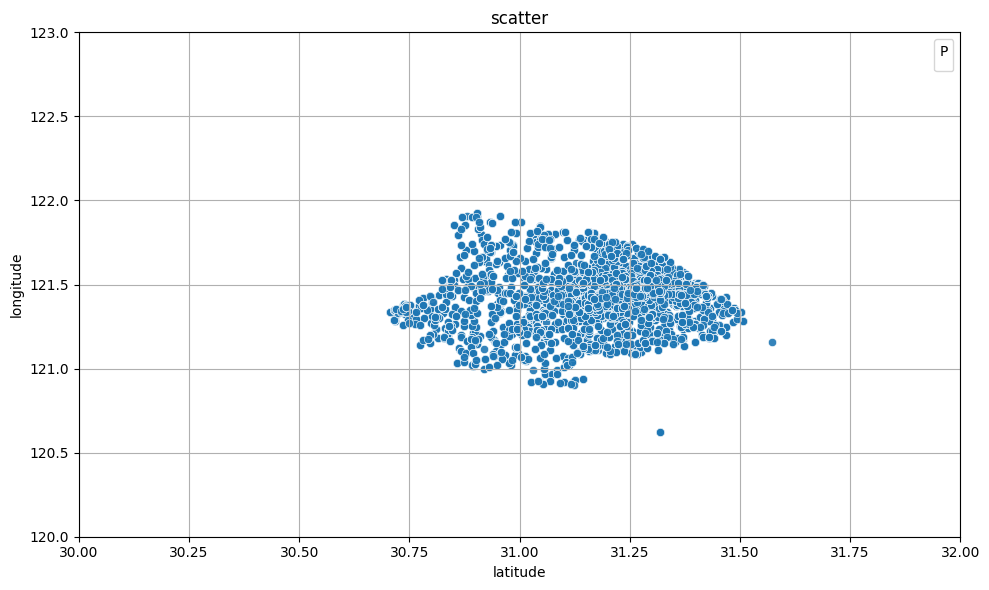

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.scatterplot(x='latitude', y='longitude', data = df_2, palette='coolwarm', alpha=0.9)

plt.title('scatter')
plt.xlabel('latitude')
plt.ylabel('longitude')
# Đặt giới hạn cho trục x và y để zoom vào phần cụ thể của biểu đồ

plt.xlim(30, 32)  # Thay x_min và x_max bằng giá trị tương ứng
plt.ylim(120, 123)  # Thay y_min và y_max bằng giá trị tương ứng

plt.legend(title='P')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df_3 = df_2[(df_2['longitude'] >= 120.75) & (df_2['longitude'] <= 122) & (df_2['latitude'] >= 30.5) & (df_2['latitude'] <= 31.5)]
print(df_3)

       location(latitude/lontitude)                           user id  \
0              31.237872/121.470259  edbc54bddf16494a49f39ac057b4185d   
1              31.237872/121.470259  f8206ab58b9bdb070673f7050242e9ee   
6              31.237872/121.470259  eb7f2c8f7030376959889a2fae9c3a1d   
14             31.246946/121.513919  40d41c461cd11402231d8e63b1d57314   
15              31.232877/121.48753  d8ff6385af928b96af66956b40ca06c4   
...                             ...                               ...   
609175         31.116903/121.595022  b4e25b177d1fe87dd398771bc8a67f59   
609243         31.235453/121.653548  1f44297aaa9a8010dfcf8dd743f47c04   
609245         31.235453/121.653548  d296f52e59ffc5c3161e52b51f514dce   
609248         31.235453/121.653548  fc500020ef20893b266ffb6f4b153814   
609250         31.235453/121.653548  691dfb17f1d4d9d8264b2b66255de753   

         latitude   longitude  
0       31.237872  121.470259  
1       31.237872  121.470259  
6       31.237872  121.4702

In [ ]:
import folium
from folium.plugins import HeatMap

# Tạo bản đồ
mymap = folium.Map(location=[np.mean(X[:,0]), np.mean(X[:,1])], zoom_start=10)

# Tạo heat map từ tọa độ của df_3[['latitude', 'longitude']]
heat_data = [[row['latitude'], row['longitude']] for index, row in df_3[['latitude', 'longitude']].iterrows()]
HeatMap(heat_data).add_to(mymap)

# Hiển thị bản đồ
mymap.save("heatmap.html")


In [ ]:
import numpy as np
from sklearn.mixture import GaussianMixture

n_cluster =  5
X = df_3[['latitude', 'longitude']].values
gm = GaussianMixture(n_components=n_cluster, random_state=42)
gm.fit(X)
cluster_label = gm.predict(X)

cluster_points = {}
for i, label in enumerate(cluster_label):
    if label not in cluster_points:
        cluster_points[label] = []
    cluster_points[label].append(X[i])

predicted_centers = np.array([np.mean(points, axis=0) for points in cluster_points.values()])


print("Toa do")
for center in predicted_centers:
    print(center)


Toa do
[ 31.25075582 121.48685211]
[ 31.1573703  121.38694075]
[ 31.13067885 121.68067224]
[ 30.95068493 121.30598669]
[ 31.28375738 121.24138861]


In [ ]:
import folium

# Tạo bản đồ
mymap = folium.Map(location=[np.mean(X[:,0]), np.mean(X[:,1])], zoom_start=10)

# Thêm marker cho các tọa độ trung tâm được dự đoán
for center in predicted_centers:
    folium.Marker(location=center, popup=str(center)).add_to(mymap)

# Hiển thị bản đồ
mymap.save("predicted_centers_map.html")